<a href="https://colab.research.google.com/github/minjeon99/ESAA_YB/blob/Week4/w4_fri_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **평가**
- **성능 평가 지표(Evaluation Metric)**: 모델 종류(분류/회귀)에 따라 나뉨

**분류의 성능 평가 지표**
- 정확도(Accuracy)
- 오차행렬(Confusion Matrix)
- 정밀도(Precision)
- 재현율(Recall)
- F1 스코어
- ROC AUC
---
분류의 유형 -- 이진 분류, 멀티 분류(결정 클래스 값 여러 개) -- 중 특히 **이진 분류**에서 중요한 지표

## **01. 정확도**
**정확도**: 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 지표
$$정확도(Accuracy) = \frac{예측 결과가 동일한 데이터 건수}{전체 예측 데이터 건수}$$
- 직관적으로 모델 예측 성능 나타내는 평가 지표
- But 데이터의 구성에 따라 ML 모델의 성능 왜곡할 가능성 -> 정확도 수치만으로 성능 평가하지는 X
  
  e.g. 타이타닉 데이터
    - ML 알고리즘 적용 후 예측 정확도 = 80%대
    - 여자의 생존 확률이 높았기 때문에 무조건 여자 -> 생존, 남자 -> 사망으로 예측해도 비슷한 수치 나올 수 있음

In [2]:
# 성별에 따라 생존자 예측하는 단순한 Classifier 생성
from sklearn.base import BaseEstimator
import numpy as np

class MyDummyClassifier(BaseEstimator):
  # fit() 메서드는 아무것도 학습하지 않음
  def fit(self, X, y=None):
    pass
  # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측
  def predict(self, X):
    pred = np.zeros( (X.shape[0], 1))
    for i in range (X.shape[0]):
      if X['Sex'].iloc[i] == 1:
        pred[i] = 0
      else:
        pred[i] = 1
    return pred

- `BaseEstimator` 상속 -> Customized 형태의 Estimator 생성 가능

In [3]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
# MyDummyClassifier 이용해 예측 수행
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


- 이렇게 단순한 알고리즘으로 예측해도 데이터의 구성에 따라 정확도가 높은 수치로 나올 수 있기 때문에,

  정확도를 평가 지표로 사용할 때에는 신중해야 함.
- 특히 불균형한(imbalanced) 레이블 값 분포에서 적합한 평가 지표가 아님

  e.g. 100개의 데이터 중 90개의 데이터 레이블=0, 10개의 데이터 레이블=1인 경우 -> 무조건 0으로 예측해도 정확도 90%

**MNIST 데이터셋**
- 레이블 값이 7인 것만 True, 나머지 False 변환 -> 불균형한 데이터 세트로 변형
- 모든 데이터를 False = 0으로 예측하는 classifier 이용 -> 정확도 약 90%

  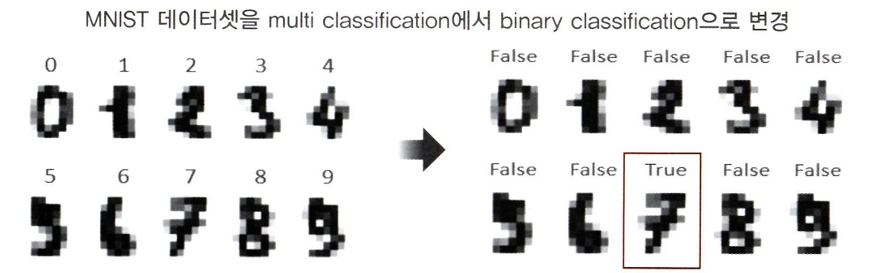

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(sel, X, y):
    pass

  # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
  def predict(self, X):
    return np.zeros( (len(X), 1), dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [6]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는: {:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는: 0.900


- 단순히 0으로 예측해도 90% 정확도 나옴

   => 정확도는 다른 평가 지표와 함께 적용해야 함

## **02. 오차 행렬**
- **오차행렬(confusion matrix, 혼동행렬)**: 4분면 행렬. 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지
  - 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함께 보여주는 지표
  - 예측 오류가 얼마인지, 어떠한 유형의 예측 오류가 발생하고 있는지

  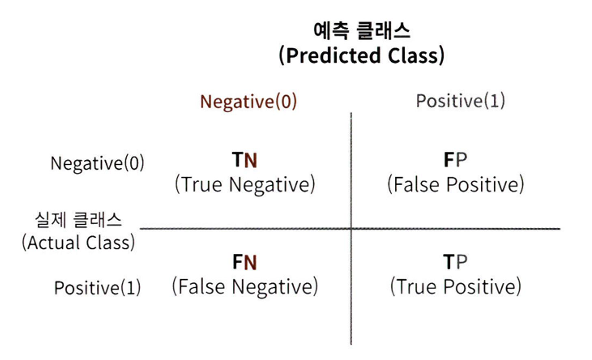
  - **TN**: 예측값 0(Negative) & 실제값 0(Negative)
  - **FP**: 예측값 1(Positive) & 실제값 0(Negative)
  - **FN**: 예측값 0(Negative) & 실제값 1(Positive)
  - **TP**: 예측값 1(Positive) & 실제값 1(Positive)
- `confusion_matrix()`: 사이킷런 오차 행렬 구하는 API

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

- 출력된 오차 행렬은 ndarray 형태

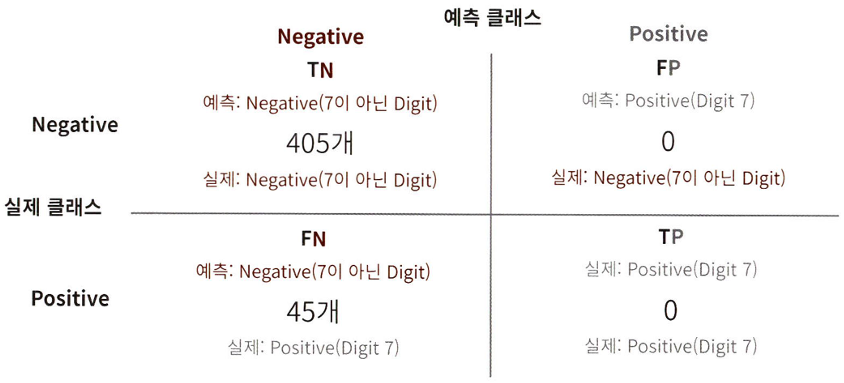

- TP, TN, FP, FN 값 조합 -> Classifier 성능 측정 주요 지표 값 알 수 있음
  - 정확도(Accuracy) = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 = (TN + TP) / (TN + FP + FN + TP)
  - 정밀도(Precision)
  - 재현율(Recall)
- 불균형한 이진 분류 데이터셋
  - Positive 데이터 건수가 매우 작음 => 데이터에 기반한 ML 알고리즘은 Negative로 예측 정확도가 높아지는 경향 발생
  - Negative로 예측할 때 정확도 높음 -> FN(Negative로 예측할 때 틀린 데이터 수) 매우 작음 & Positive 예측 적음 -> FP도 작음

  => Positive에 대한 예측 정확도 판단 못한 채 Negative에 대한 예측 정확도만으로도 분류 정확도 높게 나타나는 수치적 판단 오류 발생

## **03. 정밀도와 재현율**
- 정밀도와 재현율은 **Positive** 데이터 세트의 예측 성능에 더 초점을 맞춘 평가 지표

- **정밀도** = $\frac{TP}{FP + TP}$ : Positive로 예측한 대상 중 실제 값도 Positive로 일치한 비율
  -> FP 낮추기에 초점

  => Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표 = 양성 예측도
- **재현율** = $\frac{TP}{FN + TP}$ : 실제 Positive 대상 중 예측 값도 Positive로 일치한 비율

  = 민감도(Sensitivity) = TPR(True Positive Rate)

  -> FN 낮추기에 초점
- 이진 분류 모델의 업무 특성에 따라 둘 중 특정 평가 지표가 더 중요한 지표로 간주될 수 있음
  - 재현율 = 중요 지표: 실제 Positive 데이터 -> Negative로 잘못 판단 시 업무상 큰 영향 발생하는 경우
    
    (e.g. 암 판단 모델, 보험 사기/금융 사기 적발 모델)
  - 정밀도 = 중요 지표: 실제 Negative 데이터 -> Positive로 잘못 판단 시 업무상 큰 영향 발생하는 경우

    (e.g. 스팸 메일 여부 판단)

- `precision_score()`: **정밀도** 계산 사이킷런 API
- `recall_score()`: **재현율** 계산 사이킷런 API

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터 재로딩, 데이터 가공, 학습/테스트 데이터 분할
titanic_df = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 정밀도에 비해 재현율이 낮게 나옴

### **정밀도/재현율 트레이드오프**
- 정밀도 or 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)를 조정해 정밀도 or 재현율 수치 높일 수 있음
  - 두 지표는 상호 보완적인 평가 지표이기 때문에 한 쪽을 강제로 높이면 다른 한 쪽의 수치가 떨어지기 쉬움
- 사이킷런의 분류 알고리즘: 예측 데이터의 개별 레이블별 결정 확률 계산 -> 예측 확률이 큰 레이블값으로 예측
  - 일반적으로 이진 분류에서는 임곗값을 0.5로 결정
- `predict_proba()`: 개별 데이터별 예측 확률 반환 메서드. 테스트 피처 레코드의 개별 클래스 예측 확률을 반환
  - `predict()`와 유사하지만 반환 결과가 클래스값이 아닌 확률
  
  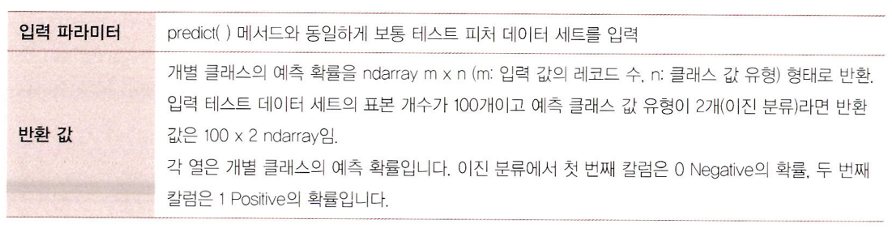

In [10]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 Shape: {}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array 병합(concatenate) -> 예측 확률과 결괏값 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 Shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
 [[0.46197474 0.53802526]
 [0.87872398 0.12127602]
 [0.87719492 0.12280508]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46197474 0.53802526 1.        ]
 [0.87872398 0.12127602 0.        ]
 [0.87719492 0.12280508 0.        ]]


- `predict()`는 `predict_proba()` 메서드에 기반해 생성된 API
  - `predict_proba()` 호출 결과로 반환된 배열에서 분류 결정 임계값보다 큰 값이 들어 있는 칼럼의 위치 받아서 최종 예측 클래스 결정

**이러한 로직을 직접 코드로 구현하며 사이킷런의 정밀도/재현율 트레이드오프 방식 이해하기**

In [11]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0, 크면 1 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


- `Binarizer` 클래스 이용해 `predict()`의 의사 코드 구현

In [12]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값 = 분류 결정 임곗값
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼 = Positive 클래스 칼럼만 추출해 Binarizer 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


- 로지스틱 회귀 Classifier 객체에서 호출된 predict()로 계산된 지표 값과 일치

In [13]:
# Binarizer의 threshold 설정값을 0.4f로 설정 => 분류 결정 임곗값: 0.5 -> 0.4
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361


- 임곗값 낮추면 재현율 올라가고 정밀도 떨어짐
  - 임곗값은 Positive 예측값을 결정하는 확률의 기준이 됨. 임곗값 낮출수록 True 값이 많아짐 -> 재현율 값 높아짐
  
    (양성 예측을 많이 하다 보니 실제 양성을 음성으로 예측하는 횟수 줄어듦)

    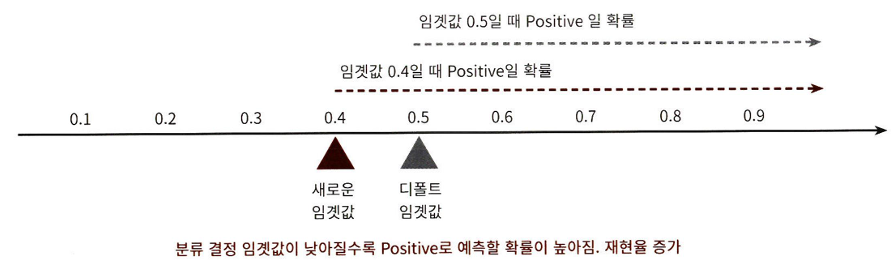

    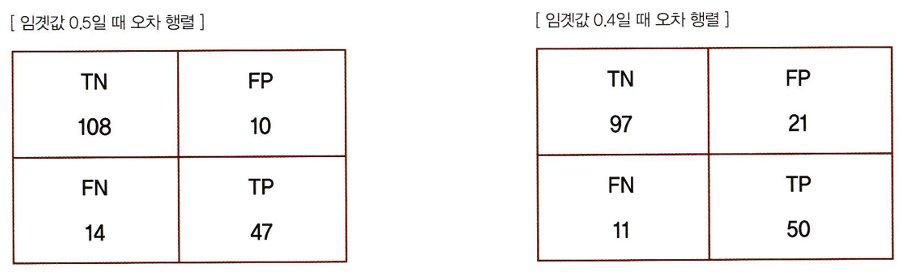
    - TP 늘어남, FN 줄어듦 => 재현율 좋아짐, 정밀도 나빠짐, 정확도 나빠짐

In [14]:
# 테스트 수행할 모든 임곗값을 리스트 객체 저장
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, threshold):
  # thresholds list 객체 내의 값을 차례로 iteration 하면서 Evaluation 수행
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


**결과**

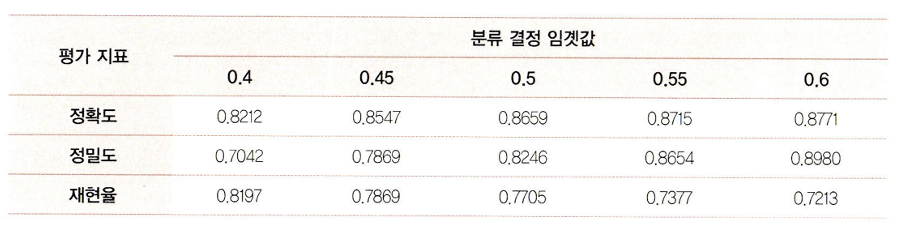

- `precision_recall_curve()`도 유사한 사이킷런 API

  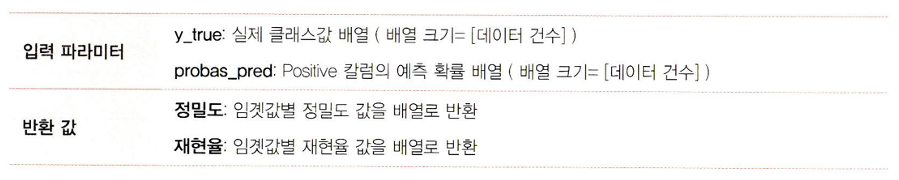

- 인자로 실제 값 데이터 세트와 레이블 값이 1일 때의 예측 확률 값 입력
- 일반적으로 0.11~0.95의 임곗값을 담은 ndarray와 이에 해당하는 정밀도, 재현율 값을 담은 ndarray 반환
  - 너무 작은 값 단위로 많이 구성됨 => 샘플로 10건, 임곗값 15 단계 추출

In [15]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

# 반환된 임곗값 배열 로우가 147건이므로 샘플로 10건만 추출, 임곗값 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임곗값 index 10개', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index],2))

# 15 stehp 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 Shape: (165,)
샘플 추출을 위한 임곗값 index 10개 [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값: [0.01 0.09 0.11 0.13 0.15 0.23 0.35 0.5  0.63 0.75 0.89]
샘플 임계값별 정밀도: [0.341 0.372 0.415 0.448 0.505 0.585 0.688 0.774 0.913 0.935 0.938]
샘플 임계값별 재현율: [1.    1.    0.967 0.918 0.902 0.902 0.869 0.787 0.689 0.475 0.246]


- 임곗값 증가할수록 정밀도 높아지나 재현율 낮아짐

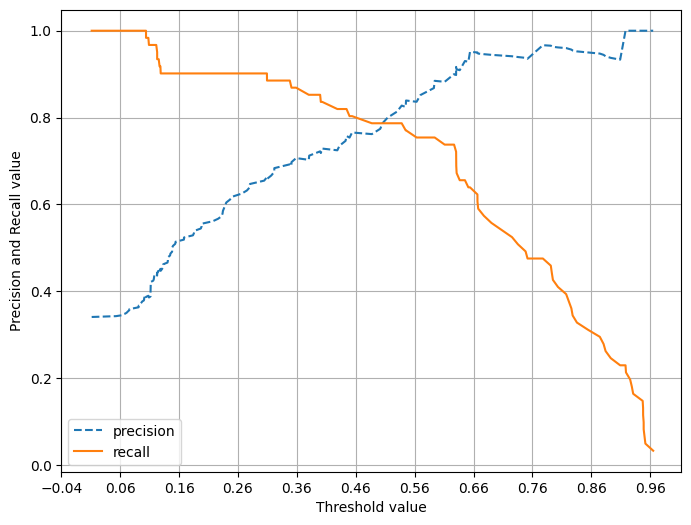

In [16]:
# 임곗값에 따른 정밀도와 재현율 값 변화 시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축: threshold값, Y축: 정밀도/재현율 값 각각 plot. 정밀도는 점선 표시
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  # threshold 값 X축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  # X, Y축 label/legend, grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

- 임곗값 낮을수록: 양성 예측 많아짐 -> 재현율 극도로 높음, 정밀도 극도로 낮아짐
- 약 0.45 지점에서 재현율과 정밀도 비슷해짐

### **정밀도와 재현율의 맹점**

**정밀도 100% 되는 방법**
- 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative 예측

  e.g. 환자가 80세 이상, 비만, 기존에 암 진단 받음, 암 세포 크기 상위 0.1% 이상 -> Positive & 나머지는 Negative 예측

**재현율 100% 되는 방법**
- 모든 데이터를 Positive로 예측
---
정밀도와 재현율 성능 수치를 한쪽만 참조하면 극단적인 수치 조작이 가능

  => 한쪽 스코어만 좋은 경우 성능이 좋지 않은 분류로 간주할 수 있음

**둘 중 하나에 상대적인 중요도를 부여해 각 예측 상황에 맞게 튜닝할 수는 있지만, 둘 중 하나만 강조하는 상황이 돼서는 안 됨**

## **04. F1 스코어**
- **F1 스코어(Score)**: 정밀도와 재현율 결합한 지표 => 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐

$$F1=\frac{2}{\frac{1}{recall}+\frac{1}{precision}}=2*\frac{precision*recall}{precision+recall}$$
- `f1_score()`: F1 스코어 계산 사이킷런 API

In [18]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


In [19]:
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  # F1 스코어 추가
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1: 0.7727
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1: 0.7840
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1: 0.7805
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1: 0.7931
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1: 0.8036


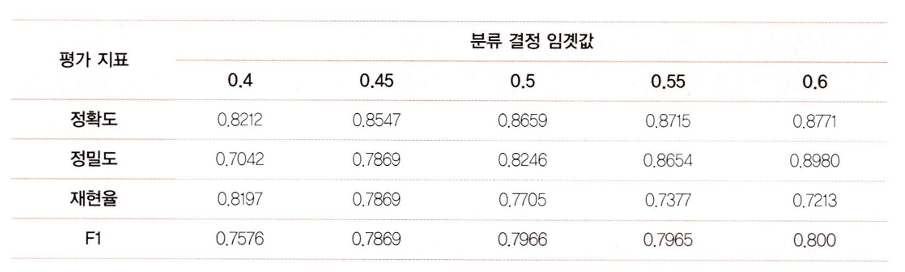

## **05. ROC 곡선과 AUC**
- ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류 예측 성능 측정에서 중요하게 사용되는 지표
- **ROC 곡선(Reciver Operation Characteristic Curve)**: FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선
  - X축: FPR(False Positive Rate)
  - Y축: TPR(True Positive Rate) = 재현율 = 민감도
- **민감도(TPR)**: 실제값 Positive(양성)가 정확히 예측돼야 하는 수준
- **특이성(TNR)**: 실제값 Negative(음성)가 정확히 예측돼야 하는 수준 - 민감도에 대응하는 지표
  - **FPR = FP / (FP + TN) = 1 - TNP = 1- 특이성**

- 가운데 직선이 ROC 곡선의 최저 값
- ROC 곡선이 가운데 직선에 가까울수록 성능 떨어짐, 멀어질수록 성능 뛰어남

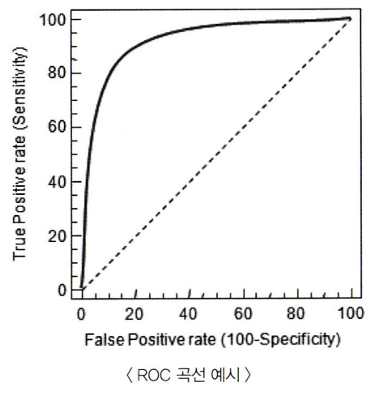

In [24]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열 로우 47건 -> 샘플로 10건 추출, 임곗값 5 Step 추출
# thresholds[0]: max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 10개의 임곗값:  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR:  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


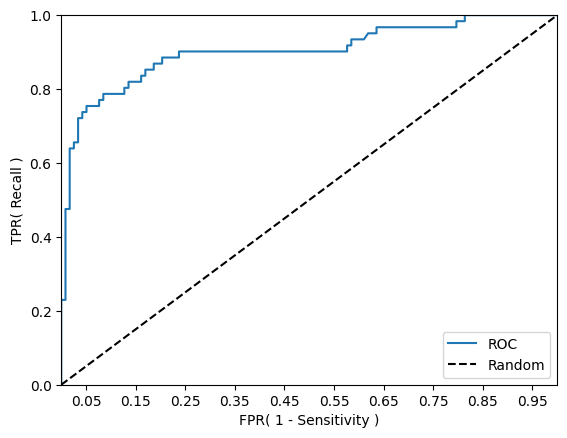

In [25]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림.
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [30]:
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8341


In [31]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))